## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Data understanding


In [162]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [163]:
# Loading the dataset
data = pd.read_csv("./data/kc_house_data.csv")

data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [164]:
df = data[['price', 'bedrooms', 'sqft_living', 'bathrooms', 'yr_built', 'floors', 'waterfront', 'condition', 'grade']].copy()
df.head()

,price,bedrooms,sqft_living,bathrooms,yr_built,floors,waterfront,condition,grade
0,221900.0,3,1180,1.00,1955,1.0,NaN,Average,7 Average
1,538000.0,3,2570,2.25,1951,2.0,NO,Average,7 Average
2,180000.0,2,770,1.00,1933,1.0,NO,Average,6 Low Average
3,604000.0,4,1960,3.00,1965,1.0,NO,Very Good,7 Average
4,510000.0,3,1680,2.00,1987,1.0,NO,Average,8 Good


In [165]:
df.shape

(21597, 9)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   sqft_living  21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   yr_built     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  object 
 7   condition    21597 non-null  object 
 8   grade        21597 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 1.5+ MB


In [167]:
df.describe()

,price,bedrooms,sqft_living,bathrooms,yr_built,floors
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2080.321850,2.115826,1970.999676,1.494096
std,3.673681e+05,0.926299,918.106125,0.768984,29.375234,0.539683
min,7.800000e+04,1.000000,370.000000,0.500000,1900.000000,1.000000
25%,3.220000e+05,3.000000,1430.000000,1.750000,1951.000000,1.000000
50%,4.500000e+05,3.000000,1910.000000,2.250000,1975.000000,1.500000
75%,6.450000e+05,4.000000,2550.000000,2.500000,1997.000000,2.000000
max,7.700000e+06,33.000000,13540.000000,8.000000,2015.000000,3.500000


# Data cleaning

### Dropping Na

In [168]:
df.dropna(subset='waterfront', inplace=True)
df.head()

,price,bedrooms,sqft_living,bathrooms,yr_built,floors,waterfront,condition,grade
1,538000.0,3,2570,2.25,1951,2.0,NO,Average,7 Average
2,180000.0,2,770,1.00,1933,1.0,NO,Average,6 Low Average
3,604000.0,4,1960,3.00,1965,1.0,NO,Very Good,7 Average
4,510000.0,3,1680,2.00,1987,1.0,NO,Average,8 Good
5,1230000.0,4,5420,4.50,2001,1.0,NO,Average,11 Excellent


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19221 entries, 1 to 21596
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        19221 non-null  float64
 1   bedrooms     19221 non-null  int64  
 2   sqft_living  19221 non-null  int64  
 3   bathrooms    19221 non-null  float64
 4   yr_built     19221 non-null  int64  
 5   floors       19221 non-null  float64
 6   waterfront   19221 non-null  object 
 7   condition    19221 non-null  object 
 8   grade        19221 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 1.5+ MB


In [170]:
df.shape

(19221, 9)

In [171]:
def check_duplicates(column):
    return column.duplicated().value_counts()

dups = check_duplicates(df)
dups


False    19190
True        31
Name: count, dtype: int64

In [172]:
df = df.drop_duplicates()

In [173]:
df.shape

(19190, 9)

In [174]:
df.describe()

,price,bedrooms,sqft_living,bathrooms,yr_built,floors
count,1.919000e+04,19190.000000,19190.000000,19190.000000,19190.000000,19190.000000
mean,5.417650e+05,3.374831,2082.792965,2.116545,1970.988640,1.493877
std,3.724888e+05,0.928381,922.772386,0.769418,29.374503,0.539301
min,7.800000e+04,1.000000,370.000000,0.500000,1900.000000,1.000000
25%,3.220000e+05,3.000000,1430.000000,1.750000,1951.000000,1.000000
50%,4.500000e+05,3.000000,1920.000000,2.250000,1975.000000,1.500000
75%,6.450000e+05,4.000000,2550.000000,2.500000,1997.000000,2.000000
max,7.700000e+06,33.000000,13540.000000,8.000000,2015.000000,3.500000


### Outliers

In [175]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

In [176]:
df = df[df['bedrooms'] != 33]
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10], dtype=int64)

In [177]:
df.shape

(19189, 9)

# Data analysis

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19189 entries, 1 to 21596
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        19189 non-null  float64
 1   bedrooms     19189 non-null  int64  
 2   sqft_living  19189 non-null  int64  
 3   bathrooms    19189 non-null  float64
 4   yr_built     19189 non-null  int64  
 5   floors       19189 non-null  float64
 6   waterfront   19189 non-null  object 
 7   condition    19189 non-null  object 
 8   grade        19189 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 1.5+ MB


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'floors'}>]], dtype=object)

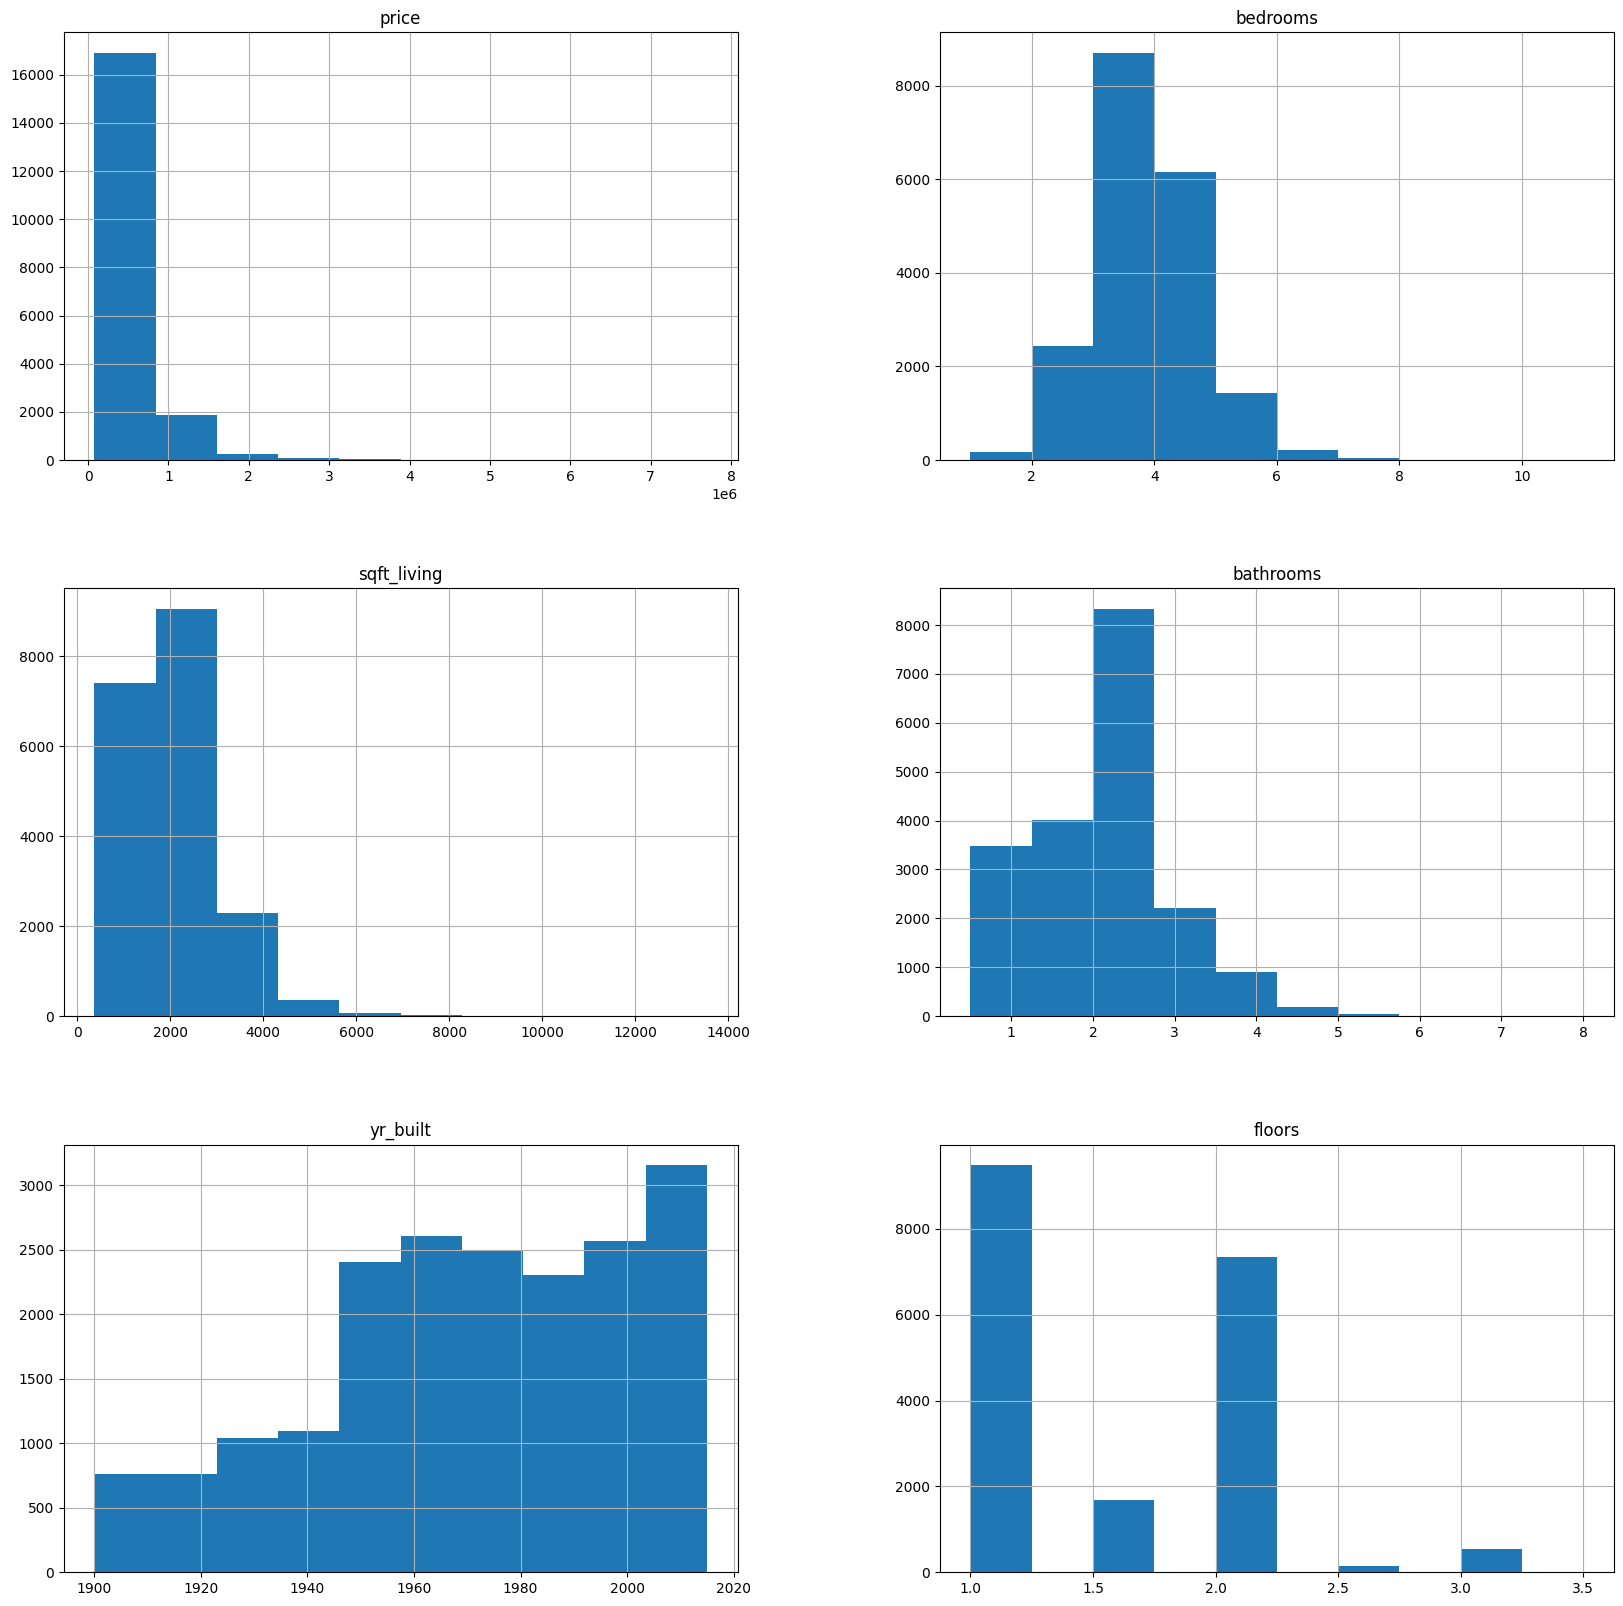

In [194]:
df.hist(figsize=(20,20))